In [1]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset

df = pd.read_csv('../FenModified1.csv')
df.head()

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
0,2004-05-22,10.7415,0.00,0.00,0.000000,0.000000,0.0,10.7415
1,2004-05-23,34.3655,8.05,3.20,0.340755,0.135455,2242.0,23.6240
2,2004-05-24,58.6060,8.12,5.03,0.334977,0.207504,2283.0,24.2405
3,2004-05-25,83.7587,8.01,3.10,0.318455,0.123247,2323.0,25.1527
4,2004-05-26,108.0027,5.58,1.43,0.230160,0.058984,2328.5,24.2440


In [3]:
# check for null values
df.isnull().sum()

Date             1
Cum. flow        0
Condensate       0
Water            0
CGR              0
WGR              0
Avg. Pressure    0
Total flow       0
dtype: int64

In [55]:
# turning the Date column to datetype object 
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
df['Date']

0      2004-05-22
1      2004-05-23
2      2004-05-24
3      2004-05-25
4      2004-05-26
          ...    
5302   2018-11-27
5303   2018-11-28
5304   2018-11-29
5305   2018-11-30
5306          NaT
Name: Date, Length: 5307, dtype: datetime64[ns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5306 non-null   object 
 1   Cum. flow      5307 non-null   float64
 2   Condensate     5307 non-null   float64
 3   Water          5307 non-null   float64
 4   CGR            5307 non-null   float64
 5   WGR            5307 non-null   float64
 6   Avg. Pressure  5307 non-null   float64
 7   Total flow     5307 non-null   float64
dtypes: float64(7), object(1)
memory usage: 331.8+ KB


In [5]:
df.describe()

,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
count,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000
mean,83937.163711,21.602225,50.172154,0.718086,2.701395,1906.785598,29.811795
std,47152.673681,18.560487,76.061487,0.588929,5.286858,222.967627,10.352953
min,10.741500,0.000000,0.000000,0.000000,0.000000,0.000000,4.506700
25%,47144.646100,9.500000,4.750000,0.385384,0.113129,1731.500000,21.595100
50%,79235.443400,18.000000,6.000000,0.570292,0.165248,1850.000000,31.034400
75%,127310.681700,26.000000,76.250000,0.744793,3.755925,2066.750000,38.229250
max,158211.196400,110.500000,495.000000,4.652305,40.082697,2595.000000,51.660900


In [57]:
# splitting the dataset into 2 part
# top 80% will be used for training and testing
# bottom 20% will be used as a new dataset

ind = int(len(df) - len(df)*0.2)
print(ind)

4245


In [58]:
# creating bottom 20% data
new_df = df.iloc[ind:]
new_df.head()

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
4245,2016-01-05,136938.8307,27.00,6.00,0.751587,0.167019,1625.5,35.9240
4246,2016-01-06,136974.7120,27.00,6.00,0.752481,0.167218,1626.0,35.8813
4247,2016-01-07,137010.7033,27.50,5.75,0.764074,0.159761,1625.0,35.9913
4248,2016-01-08,137046.8491,27.50,6.00,0.760808,0.165994,1624.0,36.1458
4249,2016-01-09,137082.7366,27.25,5.75,0.759317,0.160223,1625.5,35.8875


In [59]:
# creating top 80% data
test_df = df.iloc[:ind]
test_df

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
0,2004-05-22,10.7415,0.00,0.00,0.000000,0.000000,0.0,10.7415
1,2004-05-23,34.3655,8.05,3.20,0.340755,0.135455,2242.0,23.6240
2,2004-05-24,58.6060,8.12,5.03,0.334977,0.207504,2283.0,24.2405
3,2004-05-25,83.7587,8.01,3.10,0.318455,0.123247,2323.0,25.1527
4,2004-05-26,108.0027,5.58,1.43,0.230160,0.058984,2328.5,24.2440
...,...,...,...,...,...,...,...,...
4240,2015-12-31,136759.3306,26.00,6.00,0.722018,0.166619,1624.0,36.0102
4241,2016-01-01,136795.2621,25.75,5.75,0.716641,0.160027,1625.0,35.9315
4242,2016-01-02,136831.0885,24.50,5.75,0.683853,0.160496,1626.0,35.8264
4243,2016-01-03,136867.0377,26.00,5.75,0.723243,0.159948,1624.5,35.9492


In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4245 entries, 0 to 4244
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4245 non-null   datetime64[ns]
 1   Cum. flow      4245 non-null   float64       
 2   Condensate     4245 non-null   float64       
 3   Water          4245 non-null   float64       
 4   CGR            4245 non-null   float64       
 5   WGR            4245 non-null   float64       
 6   Avg. Pressure  4245 non-null   float64       
 7   Total flow     4245 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 265.4 KB


In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 4245 to 5306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1061 non-null   datetime64[ns]
 1   Cum. flow      1062 non-null   float64       
 2   Condensate     1062 non-null   float64       
 3   Water          1062 non-null   float64       
 4   CGR            1062 non-null   float64       
 5   WGR            1062 non-null   float64       
 6   Avg. Pressure  1062 non-null   float64       
 7   Total flow     1062 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 66.5 KB


In [66]:
# feature selection
X = test_df.drop(['Date','Cum. flow', 'Total flow'], axis=1).values
y = test_df['Total flow'].values

### Splitting data

In [17]:
from sklearn.model_selection import train_test_split

In [173]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling 

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
# creating scaling model
scaler = MinMaxScaler()

In [175]:
# scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
# X_train

In [157]:
# X_test

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [176]:
# creating early stopping parameter
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

### Creating model

In [177]:
# creating the model
model = Sequential()

# adding layers
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(1))

# adding compiler
model.compile(optimizer='adam', loss='mse')

In [178]:
# fitting model
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
93/93 [==============================] - 1s 5ms/step - loss: 1095.0557 - val_loss: 1083.3832
Epoch 2/1000
93/93 [==============================] - 0s 3ms/step - loss: 1031.5261 - val_loss: 996.8104
Epoch 3/1000
93/93 [==============================] - 0s 3ms/step - loss: 915.7173 - val_loss: 848.9028
Epoch 4/1000
93/93 [==============================] - 0s 3ms/step - loss: 730.5033 - val_loss: 624.6439
Epoch 5/1000
93/93 [==============================] - 0s 3ms/step - loss: 498.0096 - val_loss: 400.4716
Epoch 6/1000
93/93 [==============================] - 0s 2ms/step - loss: 319.0097 - val_loss: 268.1832
Epoch 7/1000
93/93 [==============================] - 0s 3ms/step - loss: 237.3618 - val_loss: 218.2437
Epoch 8/1000
93/93 [==============================] - 0s 2ms/step - loss: 207.4542 - val_loss: 196.6431
Epoch 9/1000
93/93 [==============================] - 0s 3ms/step - loss: 190.2876 - val_loss: 181.2120
Epoch 10/1000
93/93 [==============================] - 0s 3ms

93/93 [==============================] - 0s 3ms/step - loss: 26.9761 - val_loss: 28.3540
Epoch 81/1000
93/93 [==============================] - 0s 2ms/step - loss: 26.7433 - val_loss: 28.1927
Epoch 82/1000
93/93 [==============================] - 0s 3ms/step - loss: 26.5688 - val_loss: 27.8301
Epoch 83/1000
93/93 [==============================] - 0s 2ms/step - loss: 26.3641 - val_loss: 27.5792
Epoch 84/1000
93/93 [==============================] - 0s 2ms/step - loss: 26.2280 - val_loss: 27.4926
Epoch 85/1000
93/93 [==============================] - 0s 2ms/step - loss: 25.9774 - val_loss: 27.0994
Epoch 86/1000
93/93 [==============================] - 0s 3ms/step - loss: 25.7559 - val_loss: 27.0204
Epoch 87/1000
93/93 [==============================] - 0s 2ms/step - loss: 25.6104 - val_loss: 26.6343
Epoch 88/1000
93/93 [==============================] - 0s 3ms/step - loss: 25.4144 - val_loss: 26.4122
Epoch 89/1000
93/93 [==============================] - 0s 2ms/step - loss: 25.2898 - va

93/93 [==============================] - 0s 2ms/step - loss: 9.2157 - val_loss: 10.4272
Epoch 160/1000
93/93 [==============================] - 0s 2ms/step - loss: 9.1434 - val_loss: 10.3611
Epoch 161/1000
93/93 [==============================] - 0s 2ms/step - loss: 9.0743 - val_loss: 10.3453
Epoch 162/1000
93/93 [==============================] - 0s 2ms/step - loss: 9.0157 - val_loss: 10.1742
Epoch 163/1000
93/93 [==============================] - 0s 2ms/step - loss: 8.9401 - val_loss: 10.3224
Epoch 164/1000
93/93 [==============================] - 0s 2ms/step - loss: 8.8545 - val_loss: 10.0395
Epoch 165/1000
93/93 [==============================] - 0s 2ms/step - loss: 8.8378 - val_loss: 9.9539
Epoch 166/1000
93/93 [==============================] - 0s 2ms/step - loss: 8.7408 - val_loss: 9.9347
Epoch 167/1000
93/93 [==============================] - 0s 2ms/step - loss: 8.6663 - val_loss: 9.8912
Epoch 168/1000
93/93 [==============================] - 0s 2ms/step - loss: 8.6269 - val_lo

93/93 [==============================] - 0s 3ms/step - loss: 6.8051 - val_loss: 8.2848
Epoch 240/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.8172 - val_loss: 8.3120
Epoch 241/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.7616 - val_loss: 8.2804
Epoch 242/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.7387 - val_loss: 8.2970
Epoch 243/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.7456 - val_loss: 8.3096
Epoch 244/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.7399 - val_loss: 8.2919
Epoch 245/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.7229 - val_loss: 8.2799
Epoch 246/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.7545 - val_loss: 8.2849
Epoch 247/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.6813 - val_loss: 8.2290
Epoch 248/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.6875 - val_loss: 8.

93/93 [==============================] - 0s 2ms/step - loss: 6.1109 - val_loss: 8.0643
Epoch 320/1000
93/93 [==============================] - 0s 3ms/step - loss: 6.0997 - val_loss: 8.1633
Epoch 321/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.0755 - val_loss: 8.0467
Epoch 322/1000
93/93 [==============================] - 0s 3ms/step - loss: 6.0835 - val_loss: 8.0920
Epoch 323/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.0624 - val_loss: 8.0434
Epoch 324/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.0841 - val_loss: 8.0735
Epoch 325/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.0415 - val_loss: 8.1261
Epoch 326/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.0497 - val_loss: 8.0697
Epoch 327/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.0502 - val_loss: 8.0892
Epoch 328/1000
93/93 [==============================] - 0s 2ms/step - loss: 6.0363 - val_loss: 8.

93/93 [==============================] - 0s 3ms/step - loss: 5.7152 - val_loss: 7.9455
Epoch 400/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6931 - val_loss: 7.8907
Epoch 401/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6727 - val_loss: 7.9711
Epoch 402/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6859 - val_loss: 7.8869
Epoch 403/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6731 - val_loss: 7.8834
Epoch 404/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6591 - val_loss: 7.9136
Epoch 405/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6535 - val_loss: 7.9043
Epoch 406/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6571 - val_loss: 7.8988
Epoch 407/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6463 - val_loss: 8.1020
Epoch 408/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.6539 - val_loss: 7.

93/93 [==============================] - 0s 3ms/step - loss: 5.3269 - val_loss: 7.8217
Epoch 480/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.3281 - val_loss: 7.8020
Epoch 481/1000
93/93 [==============================] - 0s 3ms/step - loss: 5.3472 - val_loss: 7.8206
Epoch 482/1000
93/93 [==============================] - 0s 2ms/step - loss: 5.3926 - val_loss: 7.8595
Epoch 483/1000
93/93 [==============================] - 0s 3ms/step - loss: 5.3272 - val_loss: 7.8382
Epoch 484/1000
93/93 [==============================] - 0s 3ms/step - loss: 5.2737 - val_loss: 7.8951
Epoch 485/1000
93/93 [==============================] - 0s 3ms/step - loss: 5.2963 - val_loss: 7.8779
Epoch 486/1000
93/93 [==============================] - 0s 3ms/step - loss: 5.3333 - val_loss: 7.8644
Epoch 487/1000
93/93 [==============================] - 0s 3ms/step - loss: 5.2918 - val_loss: 7.8690
Epoch 488/1000
93/93 [==============================] - 0s 3ms/step - loss: 5.3202 - val_loss: 7.

<AxesSubplot:>

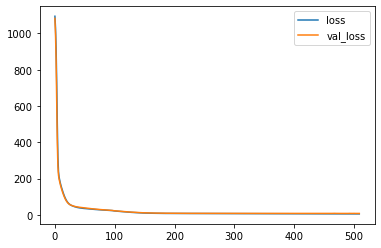

In [179]:
# measuring loss
losses1 = pd.DataFrame(model.history.history)
losses1.plot()

In [180]:
# model predicting for test data
predictions = model.predict(X_test)
predictions

array([[21.40644 ],
       [38.13917 ],
       [44.709835],
       ...,
       [32.726963],
       [33.30394 ],
       [20.290985]], dtype=float32)

### Evaluation

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [181]:
# evaluation
MSE = mean_squared_error(y_test, predictions)
print('MSE: %0.4f' % MSE)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %0.4f' % RMSE)
EVS = explained_variance_score(y_test, predictions)
print('EVS: %0.4f' % EVS)

MSE: 7.8066
RMSE: 2.7940
EVS: 0.9072


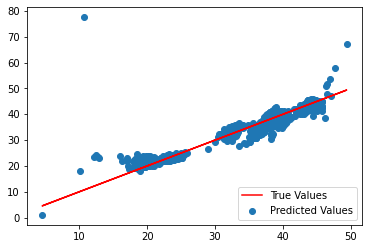

In [182]:
# plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, label='Predicted Values')
plt.plot(y_test, y_test, color='r', label='True Values')
plt.legend()

In [183]:
# creating new test data
new_X_test =  new_df.drop(['Date', 'Cum. flow', 'Total flow'], axis=1).values
new_y_test = new_df['Total flow'].values

In [184]:
# scaling new test data
new_X_test = scaler.transform(new_X_test)

In [185]:
new_X_test

array([[0.22863741, 0.01092233, 0.14165312, 0.01047346, 0.05600404],
       [0.22863741, 0.01092233, 0.14184993, 0.01048941, 0.05650858],
       [0.23325635, 0.01041667, 0.14440083, 0.00989098, 0.0554995 ],
       ...,
       [0.01154734, 0.59142395, 0.0471739 , 2.16183534, 0.02270434],
       [0.01154734, 0.57928803, 0.04777297, 2.13542075, 0.02421796],
       [0.01616628, 0.58131068, 0.05821474, 2.14882479, 0.02573158]])

In [186]:
# model prediction for new test data
new_predictions = model.predict(new_X_test)
new_predictions

array([[32.910103],
       [32.859615],
       [33.016907],
       ...,
       [10.805975],
       [10.718463],
       [10.699728]], dtype=float32)

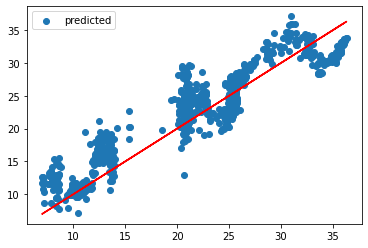

In [190]:
plt.scatter(new_y_test, new_predictions, label='predicted')
plt.plot(new_y_test, new_y_test, color='r')
plt.legend()


Text(0.5, 0, 'Year')

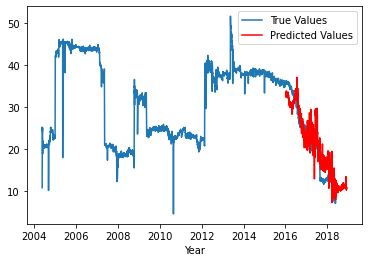

In [191]:
# plt.figure(figsize=(16,6))
plt.plot(df['Date'],df['Total flow'],label='True Values')
plt.plot(df['Date'].iloc[ind:],new_predictions,color='r',label='Predicted Values')
plt.legend()
plt.xlabel('Year')